# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


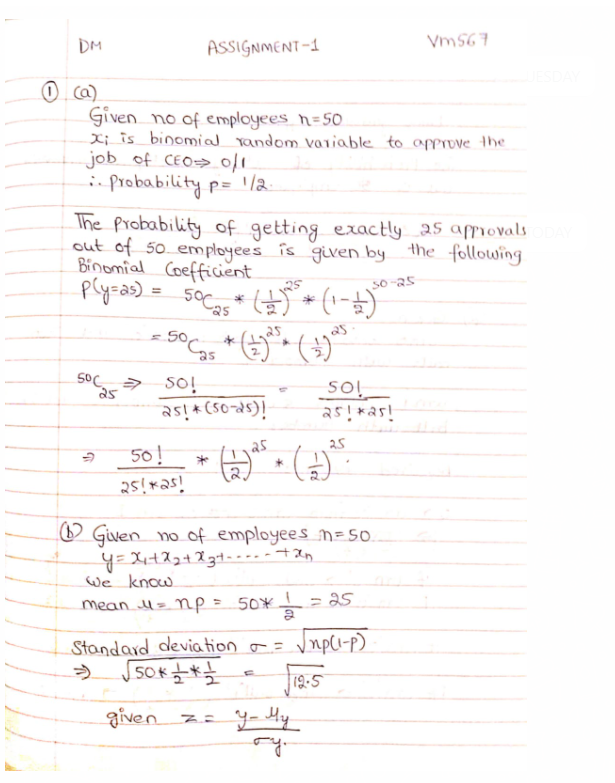

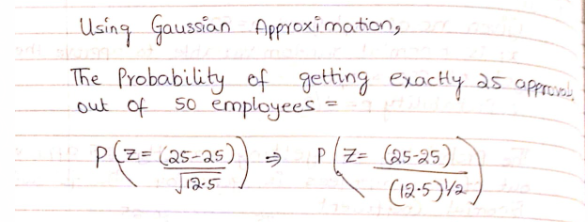

## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

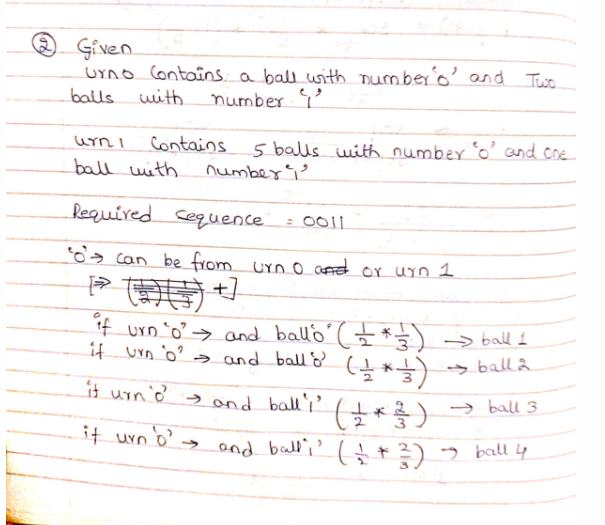

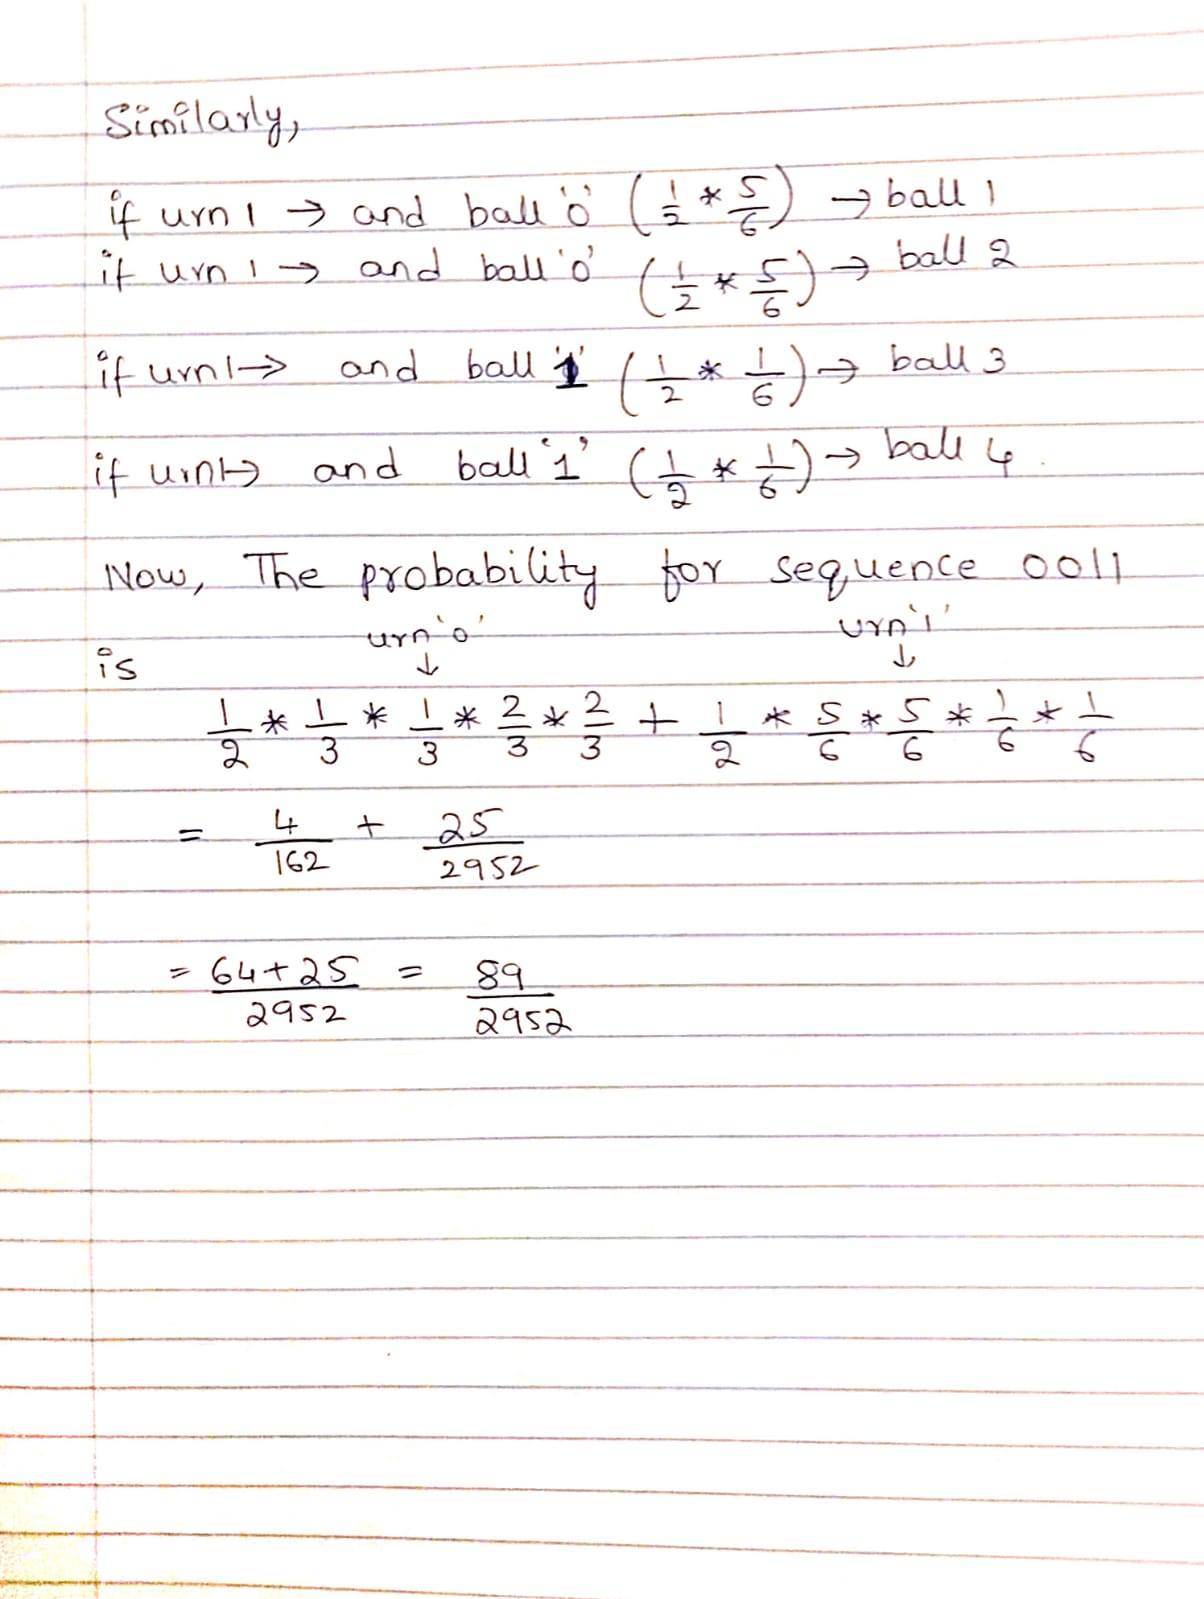

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


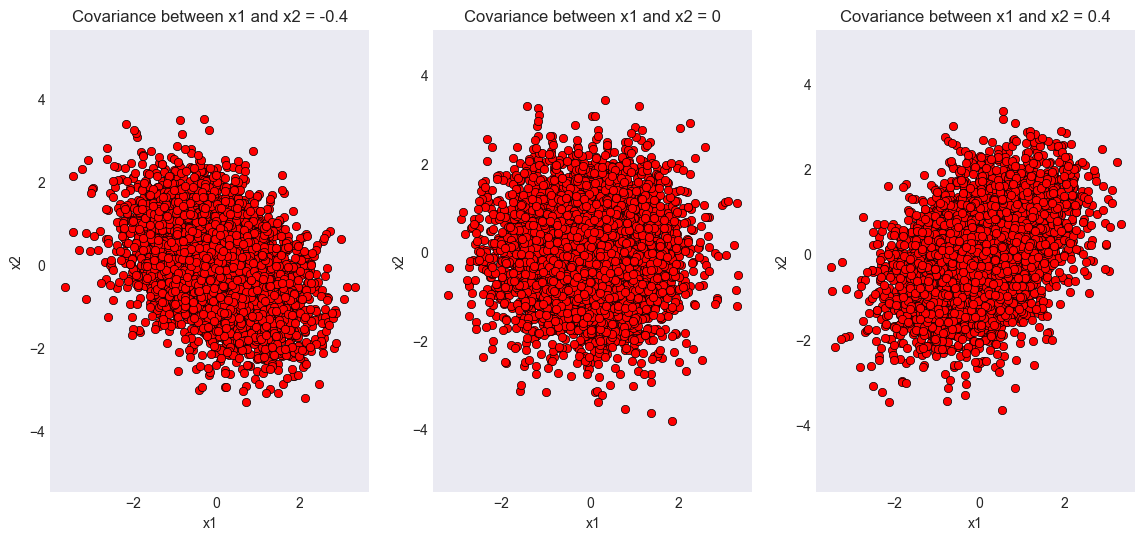

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# Initializing the random seed
rand_seed=1000
 # covariance values
cov_val = [-0.4, 0, 0.4]
 
mean = np.array([0,0])

 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distibution with given mean and covariance matrix
    dist = multivariate_normal(cov = cov, mean = mean,
                                seed = rand_seed)
     
    # Generating 5000 samples out of the distibution
    x = dist.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(x[:,0],x[:,1], 'o', c='red',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
     
plt.show()

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


                  Date                  Day  High Temp (°F)  Low Temp (°F)  \
0  2016-04-01 00:00:00  2016-04-01 00:00:00            78.1           66.0   
1  2016-04-02 00:00:00  2016-04-02 00:00:00            55.0           48.9   
2  2016-04-03 00:00:00  2016-04-03 00:00:00            39.9           34.0   
3  2016-04-04 00:00:00  2016-04-04 00:00:00            44.1           33.1   
4  2016-04-05 00:00:00  2016-04-05 00:00:00            42.1           26.1   

  Precipitation  Brooklyn Bridge  Manhattan Bridge  Williamsburg Bridge  \
0          0.01           1704.0              3126               4115.0   
1          0.15            827.0              1646               2565.0   
2          0.09            526.0              1232               1695.0   
3      0.47 (S)            521.0              1067               1440.0   
4             0           1416.0              2617               3081.0   

   Queensboro Bridge  Total  
0             2552.0  11497  
1             1884.0

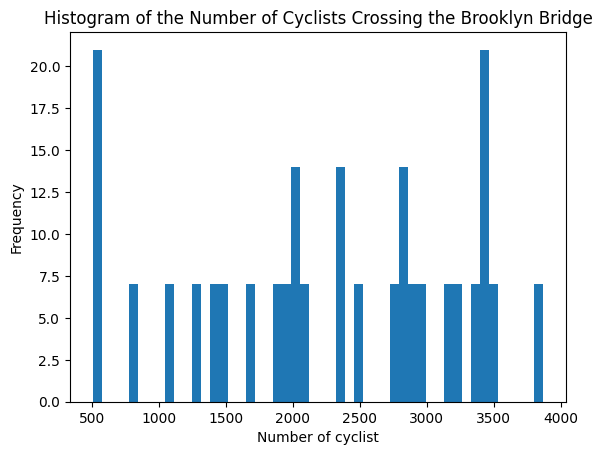

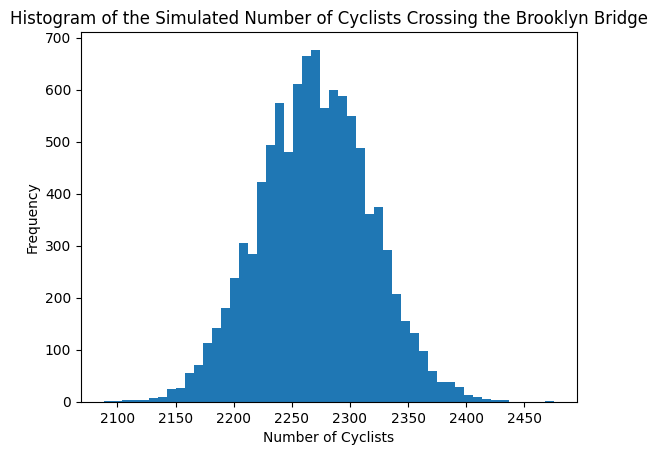

In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Load the dataset into a pandas DataFramedf
df = pd.read_csv('data/dataset.csv',delimiter=',')
del(df['Index'])
print(df.head())


# Plot the histogram of the number of cyclists
plt.hist(df['Brooklyn Bridge'],bins=50)
plt.xlabel('Number of cyclist')
plt.ylabel('Frequency')
plt.title('Histogram of the Number of Cyclists Crossing the Brooklyn Bridge')
plt.show()


# Parameters of the Poisson distribution
lambda_ = df['Brooklyn Bridge'].mean() # mean of the observed number of cyclists
n_samp = 10000 # number of samples to generate
#Generatethe simulated number of cyclists sim_cyclists
sim_cyclists = np.random.poisson(lambda_, n_samp)
# # Plot the histogram of the simulated number of cyclists
plt.hist(sim_cyclists, bins=50)
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.title('Histogram of the Simulated Number of Cyclists Crossing the Brooklyn Bridge')
plt.show()

# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

20000
10000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
what is a 1
what is i 0


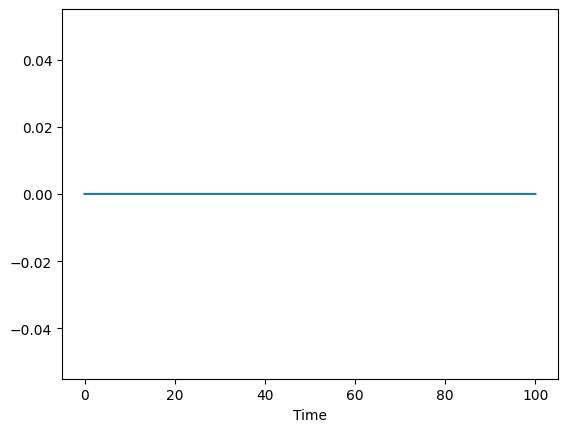

what is a 3
what is i 1


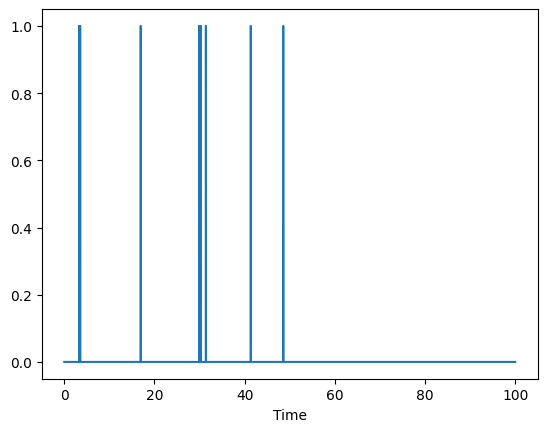

what is a 4
what is i 2


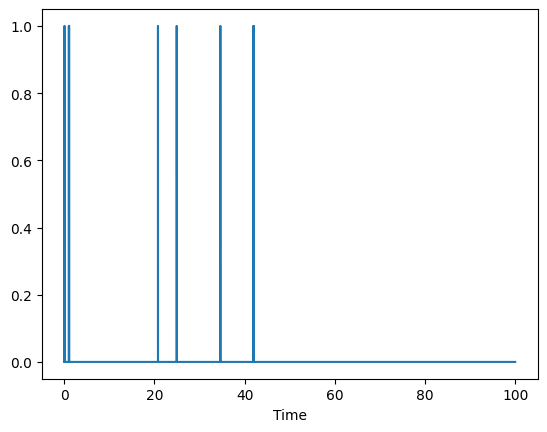

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Arrival rates of the API requests
A= [1, 3, 4]
# Service time of the requests (exponential random variable with rate 4)
service_time = np.random.exponential(scale=1/4, size=10000)
#Time units
T = 100
#Step size
dt= 0.005
# Number of time steps
n_steps = int(T / dt)
# Initialize the number of requests waiting in the queue
queue_length = np.zeros((len(A), n_steps))
# Simulate the behavior of the queue for i,
print(n_steps)
print(len(service_time))
for i, a in enumerate(A):
    time = 0
    requests = 0
    for j in range(len(service_time)):
        if np.random.rand() < a * dt:
            requests += 1
        if requests >0:
            time += dt
            service = service_time[j]
            if time >= service:
                time -=service
                requests -= 1
                queue_length[i, j] = requests
# Plot the number of requests waiting in the queue as a function of timetime = np.arange(0, T, dt)

print(queue_length)
time = np.arange(0, T, dt)

for i, a in enumerate(A):
    print("what is a",a) 
    print("what is i",i) 
    plt.plot(time, queue_length[i, :], label='Arrival rate = {}'.format(a))
    plt.xlabel('Time')
    plt.show()